In [4]:
import numpy as np 
import pandas as pd 


In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# DATA PREPERATION AND CLEANING

In [6]:
!pip install jovian opendatasets --upgrade --quiet

In [7]:
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress/' 

import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\covid-world-vaccination-progress" (use force=True to force download)


In [8]:
df=pd.read_csv("country_vaccinations.csv")
df.head(10)
df.drop(['source_name','source_website','daily_vaccinations_raw','total_vaccinations_per_hundred','daily_vaccinations_per_million','people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred'],axis=1)
#axis=1 acts as a column

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,Pfizer/BioNTech
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,64.0,Pfizer/BioNTech
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,64.0,Pfizer/BioNTech
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,63.0,Pfizer/BioNTech
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,66.0,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...
3614,Wales,NaN,2021-02-15,803178.0,795927.0,7251.0,24418.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
3615,Wales,NaN,2021-02-16,820339.0,807351.0,12988.0,23033.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
3616,Wales,NaN,2021-02-17,841975.0,822633.0,19342.0,22012.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
3617,Wales,NaN,2021-02-18,864498.0,839065.0,25433.0,20649.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [9]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.393000e+03,1.981000e+03,1.324000e+03,2.019000e+03,3.483000e+03,2393.000000,1981.000000,1324.000000,3483.000000
mean,1.521028e+06,1.269657e+06,3.888861e+05,7.453608e+04,5.754796e+04,6.174785,5.243503,1.807364,2279.315820
std,5.038410e+06,4.148487e+06,1.476223e+06,2.065813e+05,1.784900e+05,11.530328,8.593589,4.604362,3788.432525
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.989300e+04,2.702000e+04,8.366000e+03,2.021000e+03,1.207500e+03,0.590000,0.610000,0.130000,349.000000
50%,1.917820e+05,1.694400e+05,3.395450e+04,1.164200e+04,6.081000e+03,2.420000,2.370000,0.720000,1039.000000
75%,7.689500e+05,6.324390e+05,1.947678e+05,5.658950e+04,2.922500e+04,5.570000,4.430000,1.512500,1978.000000
max,6.128950e+07,4.280960e+07,1.789567e+07,2.242472e+06,1.916190e+06,87.070000,49.750000,37.320000,30869.000000


In [10]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION


## RAW VISUALIZATION OF COUNTRIES

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rc('font', size=12)

## 1. INDIA

In [12]:
df_India = df[df["iso_code"] == 'IND'].copy().head(5)
df_India.drop(['total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','source_name','source_website','daily_vaccinations_raw'],axis = 1, inplace = True)
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
1554,India,IND,2021-01-15,0.0,NaN,NaN,NaN,"Covaxin, Oxford/AstraZeneca"
1555,India,IND,2021-01-16,191181.0,NaN,NaN,191181.0,"Covaxin, Oxford/AstraZeneca"
1556,India,IND,2021-01-17,224301.0,NaN,NaN,112150.0,"Covaxin, Oxford/AstraZeneca"
1557,India,IND,2021-01-18,454049.0,NaN,NaN,151350.0,"Covaxin, Oxford/AstraZeneca"
1558,India,IND,2021-01-19,674835.0,NaN,NaN,168709.0,"Covaxin, Oxford/AstraZeneca"


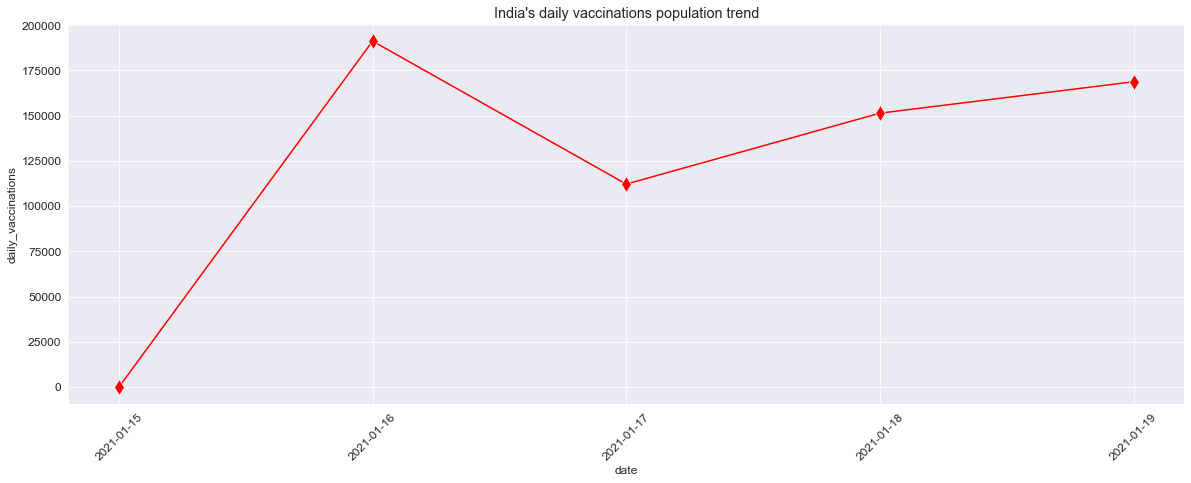

In [51]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df_India,x="date",y="daily_vaccinations",marker='d',markersize= 12, color = 'Red')

plt.title("India's daily vaccinations population trend")
plt.xticks(rotation=45)
plt.show();

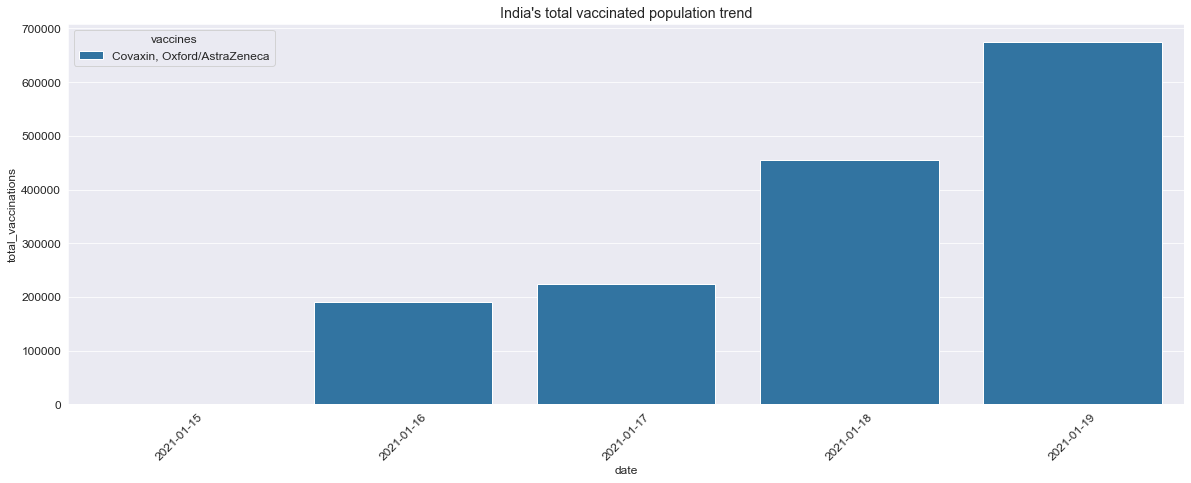

In [40]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_India, y="total_vaccinations",x="date",hue = 'vaccines')

plt.title("India's total vaccinated population trend")
plt.xticks(rotation=45);

## 2. CHINA

In [104]:
df_China = df[df["iso_code"] == 'CHN'].copy().head(5)
df_China.describe()

,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
count,5.000000e+00,5.0,5.000000,5.000000
mean,3.000000e+05,0.0,150000.000000,0.020000
std,6.708204e+05,0.0,83852.549156,0.044721
min,0.000000e+00,0.0,0.000000,0.000000
25%,0.000000e+00,0.0,187500.000000,0.000000
50%,0.000000e+00,0.0,187500.000000,0.000000
75%,0.000000e+00,0.0,187500.000000,0.000000
max,1.500000e+06,0.0,187500.000000,0.100000


In [151]:
df_China

,country,iso_code,date,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,vaccines
660,China,CHN,2020-12-15,1500000.0,0.0,0.1,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
661,China,CHN,2020-12-16,0.0,187500.0,0.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
662,China,CHN,2020-12-17,0.0,187500.0,0.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
663,China,CHN,2020-12-18,0.0,187500.0,0.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
664,China,CHN,2020-12-19,0.0,187500.0,0.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"


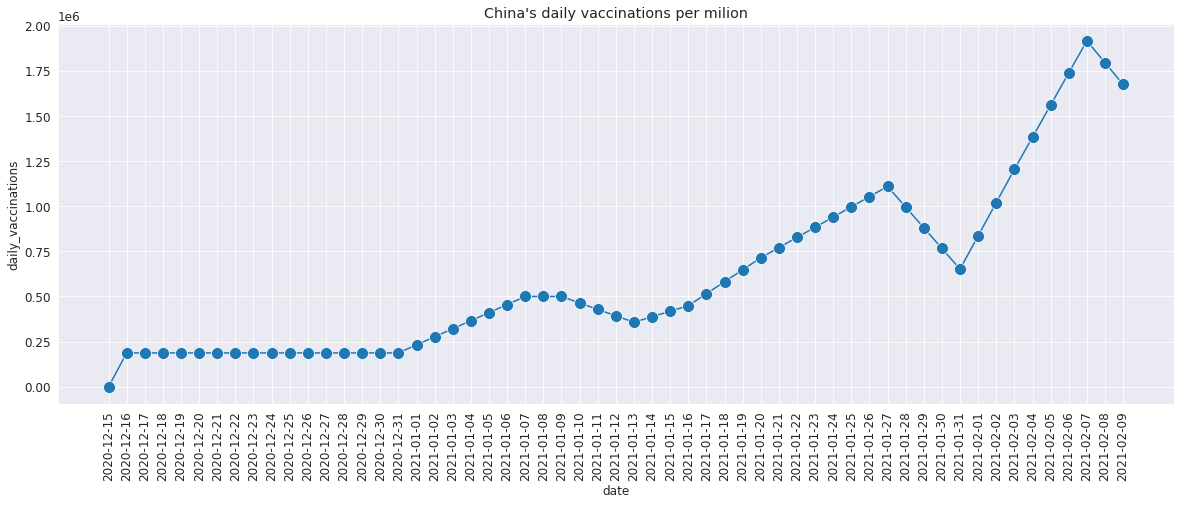

In [21]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_China,x="date",y="daily_vaccinations",marker='o',markersize =12);

plt.xticks(rotation=90);
plt.title("China's daily vaccinations per milion");

## 3. UNITED STATES OF AMERICA

In [170]:
df_USA = df[df["iso_code"] == 'USA'].copy().head(5)
df_USA


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3487,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3488,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3489,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3490,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3491,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


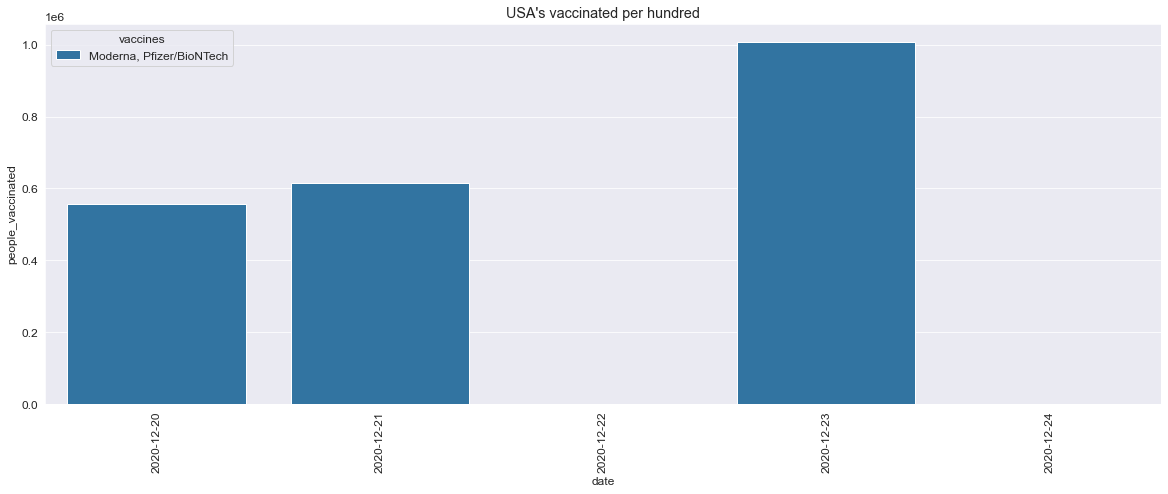

In [153]:
plt.figure(figsize=(20,7))

df_USA.drop(df_USA.index[df_USA['people_vaccinated'] == 0], inplace = True)

sns.barplot(data=df_USA,x="date",y="people_vaccinated", hue = 'vaccines')
plt.title("USA's vaccinated per hundred")

plt.xticks(rotation=90);

plt.show();

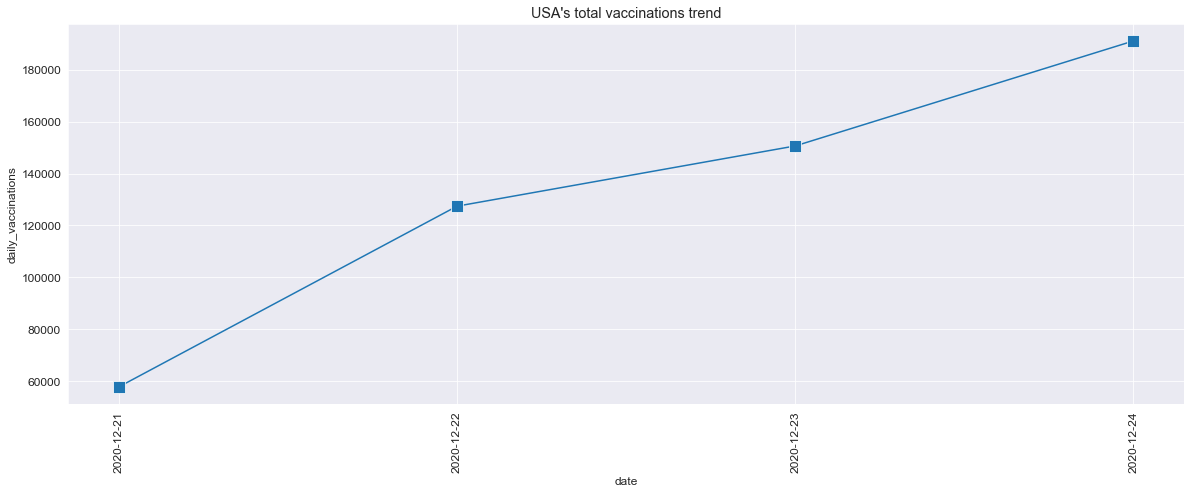

In [154]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_USA,x="date",y="daily_vaccinations",marker='s', markersize = 12);

plt.xticks(rotation=90);
plt.title("USA's total vaccinations trend");

# 4. RUSSIA

In [155]:
df_Russia = df[df["iso_code"] == 'RUS'].copy().head(5)
df_Russia

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2764,Russia,RUS,2020-12-15,28500.0,28500.0,NaN,NaN,NaN,0.02,0.02,NaN,NaN,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
2765,Russia,RUS,2020-12-16,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
2766,Russia,RUS,2020-12-17,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
2767,Russia,RUS,2020-12-18,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
2768,Russia,RUS,2020-12-19,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...


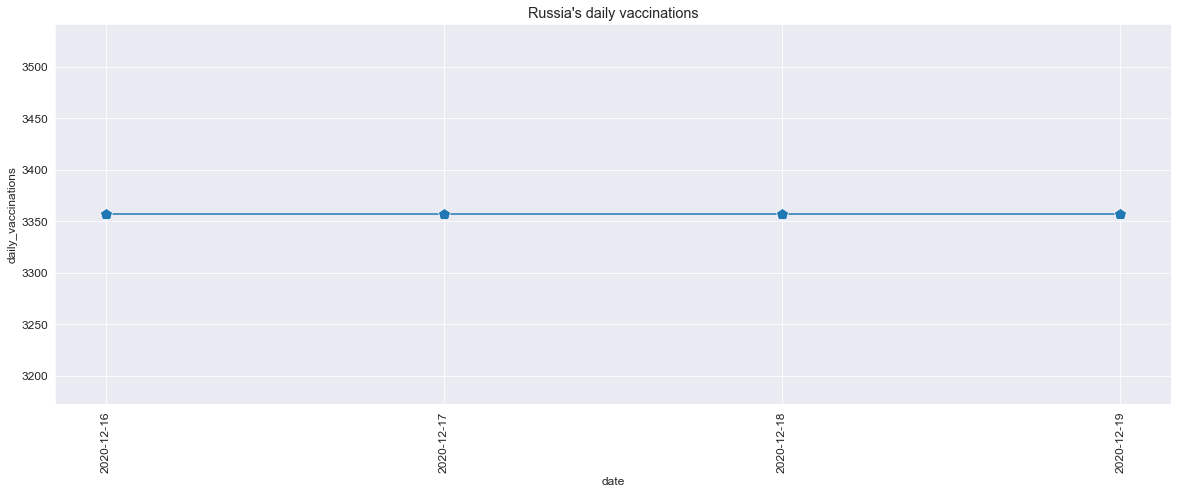

In [156]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_Russia,x="date",y="daily_vaccinations",marker='p', markersize = 12);

plt.xticks(rotation=90)
plt.title("Russia's daily vaccinations");

# **1. Which country developed Vaccine the fastest?**

In [110]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines','total_vaccinations_per_hundred']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]



vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending=False)

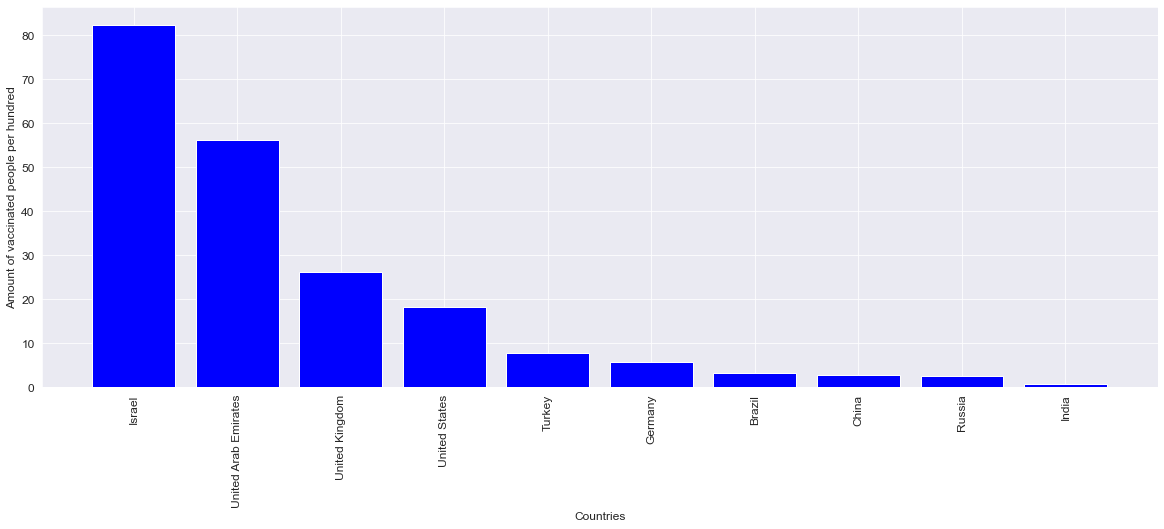

In [70]:
plt.figure(figsize=(20, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred, color = 'Blue')


plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

# **2. Which country has the highest vaccinated people?**

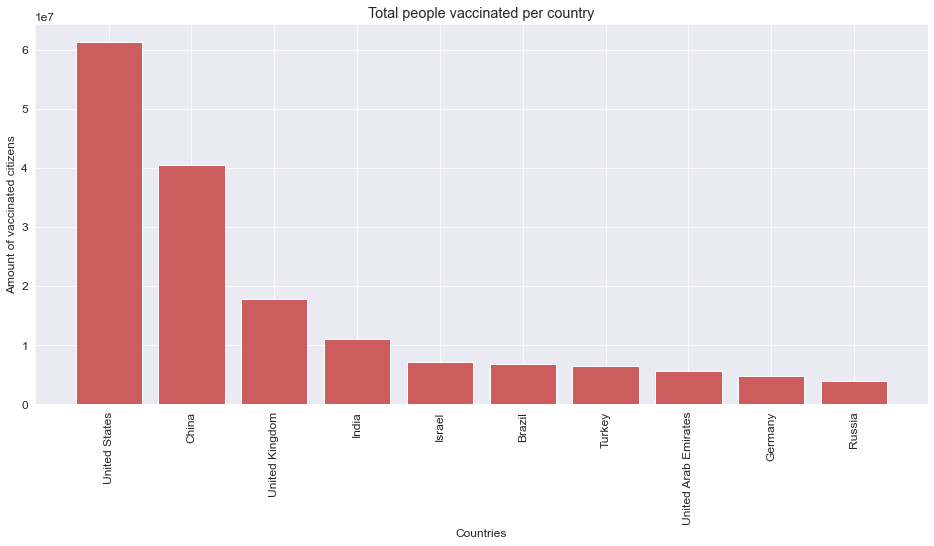

In [74]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]

plt.figure(figsize=(16, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations, color = 'indianred')

plt.title('Total people vaccinated per country')
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated citizens')
plt.xlabel('Countries')
plt.show();

# **3. Which categories of vaccine's are offered?**

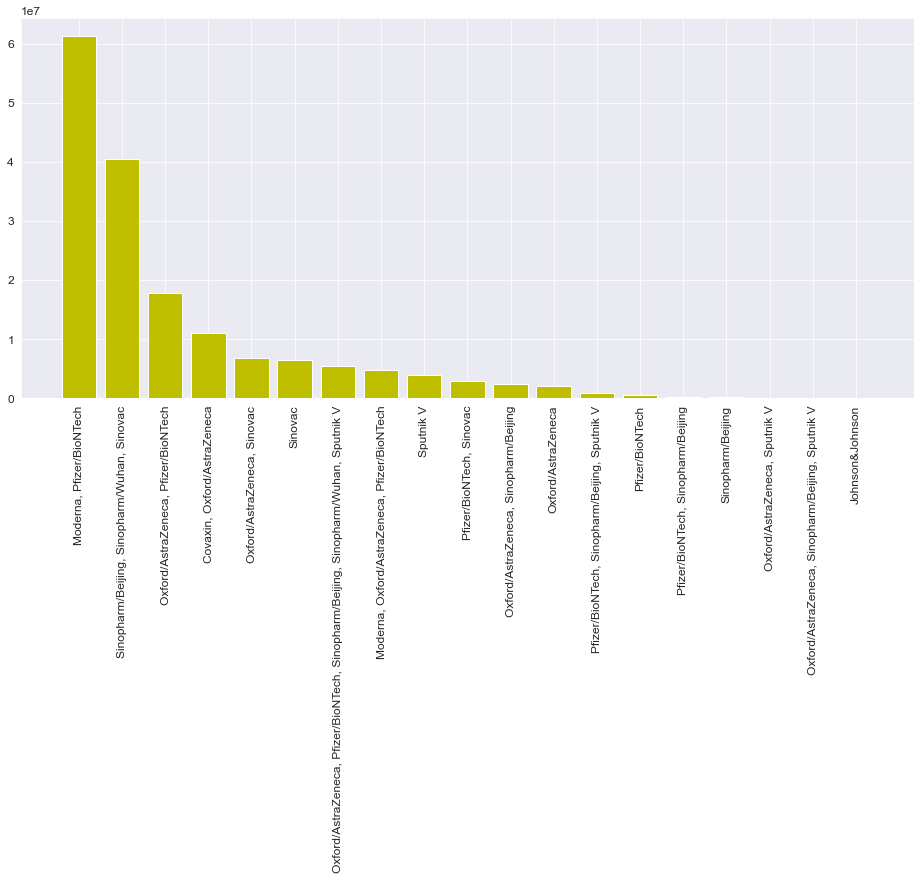

In [111]:
plt.figure(figsize=(16,7))
grp = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_no = df[grp].groupby('vaccines').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])


plt.bar(vacc_no.index, vacc_no.total_vaccinations, color ='y')


#plt.bar(data = df_vaccines, x=vaccines, y = daily_vaccinations, hue = country)

plt.xticks(rotation=90);

# 4. Which country is using what vaccine?

In [2]:
#GeoGlobal Data For All the countries
fig = px.choropleth(df, locations="iso_code",
                    color="vaccines",
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title= "Vaccines used by different countries")
fig.update_layout(showlegend=False)
fig.show()

NameError: name 'px' is not defined

In [35]:
import jovian

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abhisheks958999/covid-vaccination-progress" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/abhisheks958999/covid-vaccination-progress


'https://jovian.ai/abhisheks958999/covid-vaccination-progress'